In [1]:
import pandas as pd
import numpy as np

In [2]:
df_all = pd.read_csv("D:\\datapool\\cs-training.csv")

df_all["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_U"] = df_all["SeriousDlqin2yrs"]
df_all.loc[df_all["test_cat1"] == "0_test","test_cat1"] = np.nan
df_all.loc[df_all["test_cat2"] == "0_test","test_cat2"] = np.nan
df_all.loc[df_all["test_cat3"] == "0_test","test_cat3"] = np.nan


df_train = df_all.sample(frac = 0.7)
df_test = df_all[df_all.index.isin(df_train.index) == False]

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

x_test = df_test.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
#y_column = u'SeriousDlqin2yrs'
y_test = df_test[u'SeriousDlqin2yrs']


In [10]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:87: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,odds,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",21000,419,20581,0.210002,0.066629,0.020359,0.059891,-1.254583,0.188326
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0836]",21000,349,20651,0.210716,0.066629,0.016900,0.049886,-1.440777,0.231721
2,RevolvingUtilizationOfUnsecuredLines,"(0.0836, 0.274]",21000,596,20404,0.208196,0.066629,0.029210,0.085192,-0.893576,0.109913
3,RevolvingUtilizationOfUnsecuredLines,"(0.274, 0.698]",21000,1468,19532,0.199298,0.066629,0.075159,0.209834,0.051517,0.000543
4,RevolvingUtilizationOfUnsecuredLines,"(0.698, inf]",21000,4164,16836,0.171789,0.066629,0.247327,0.595197,1.242626,0.526138


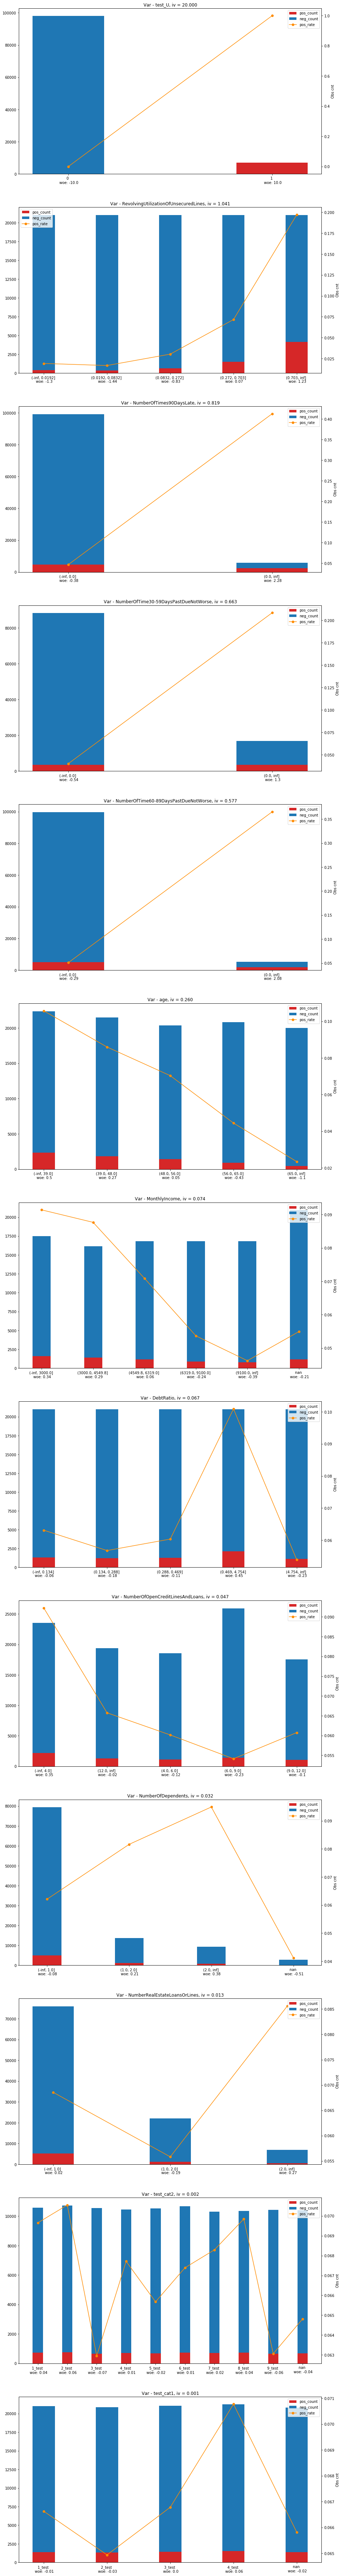

In [102]:
#ximu.gen_woe_iv_plot()
#ximu.woe_iv_plot

In [11]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [12]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2"
                    ,"NumberRealEstateLoansOrLines","NumberOfOpenCreditLinesAndLoans"]
ximu.gen_model(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.184192
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Sep 2017   Pseudo R-squ.:                  0.2477
Time:                        14:57:50   Log-Likelihood:                -19340.
converged:                       True   LL-Null:                       -25707.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.6986      0.0

In [13]:
ximu.gen_score(score_base = 600, odds_change_rt = 20)

base_odds:  0.071384841435
reverse_base_odds:  14.0085763293
base_rt:  20
base_score:  600
count    105000.000000
mean        620.391259
std          34.251842
min         477.106449
25%         601.669988
50%         629.824855
75%         645.225039
max         664.514700
Name: final_score, dtype: float64
<name>.df_scored, <name>.woe_t_scored available


In [14]:
ximu.df_scored.shape

(105000, 8)

In [15]:
ximu.model_evaluate(test_x = x_test,test_y = y_test)

ROC_TEST-(AUC = 0.85)
ROC-(AUC = 0.85)
ks_value: 0.55
ks_position 6.0
base_odds:  0.071384841435
reverse_base_odds:  14.0085763293
base_rt:  20
base_score:  600
count    45000.000000
mean       620.436043
std         34.218071
min        477.106449
25%        601.669988
50%        630.110720
75%        645.225039
max        664.514700
Name: final_score, dtype: float64
<name>.roc_plot/ks_plot/lift_chart/score_dist_chart/lift_t available


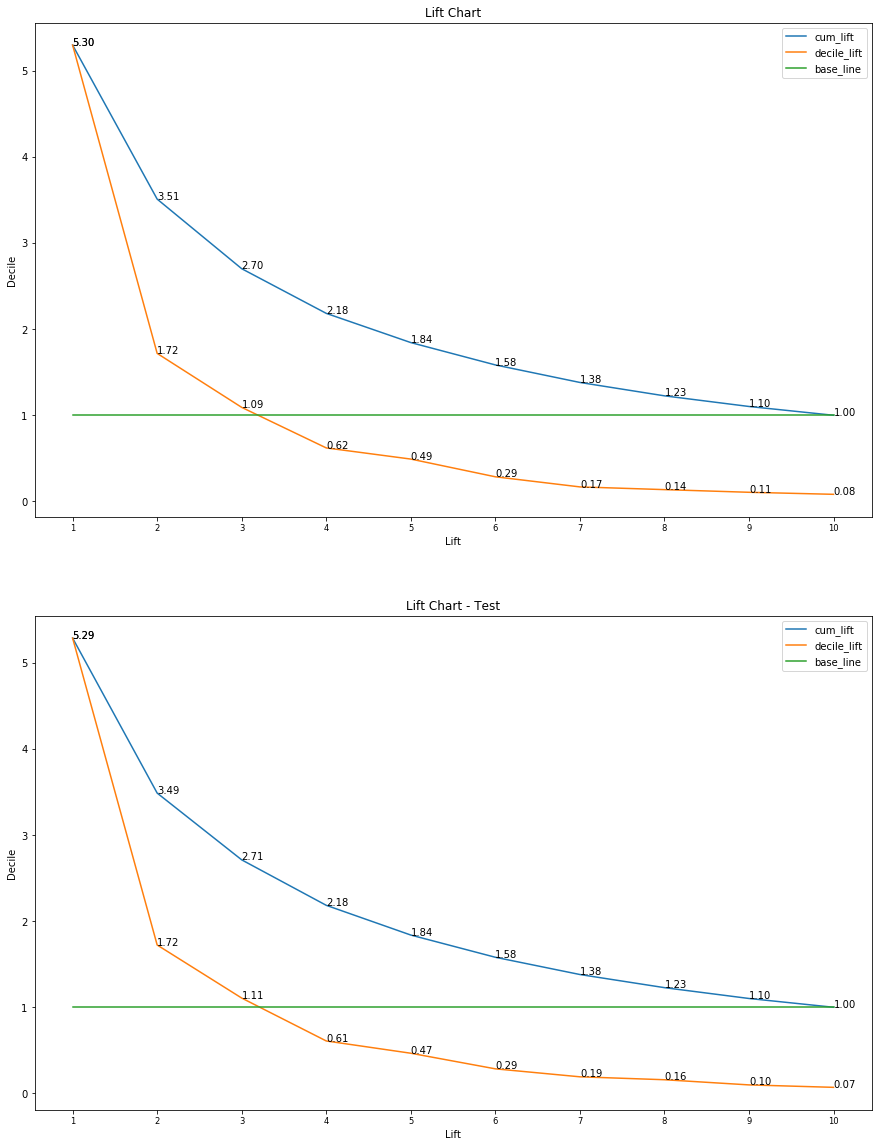

In [16]:
ximu.lift_chart

In [105]:
#需要变形
df_binned_test,df_woe_replaced_test = ximu.get_woe_replaced_df(x_test)

In [108]:
#x_scored_test = ximu.gen_score(x_test)

base_odds:  0.0718113612004
reverse_base_odds:  13.9253731343
base_rt:  20
base_score:  600
p:  28.8539008178
q:  524.007118392
DebtRatio
MonthlyIncome
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
__intercept
count    45000.000000
mean       620.431720
std         34.288330
min        477.124800
25%        601.858313
50%        628.624407
75%        645.679682
max        664.947508
Name: final_score, dtype: float64


In [109]:
ximu.model_evaluate()

ROC-(AUC = 0.85)
ks_value: 0.55
ks_position 5.0
<name>.roc_plot/ks_plot/lift_chart/score_dist_chart/lift_t available


In [ ]:
ximu.woe_t_scored

In [ ]:
ximu.score_dist_chart

In [ ]:
ximu.ks_plot

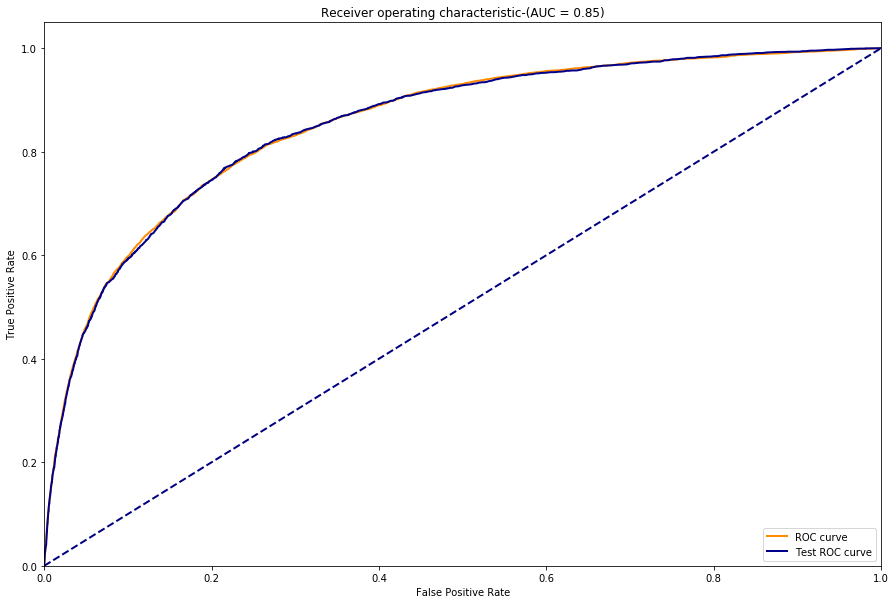

In [17]:
ximu.roc_plot

In [18]:
ximu.woe_t_scored

,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,odds,p_yi,woe,iv_i,params,score
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",21000,419,20581,0.210002,0.066629,0.020359,0.059891,-1.254583,1.883258e-01,0.630995,22.841760
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0836]",21000,349,20651,0.210716,0.066629,0.016900,0.049886,-1.440777,2.317206e-01,0.630995,26.231738
2,RevolvingUtilizationOfUnsecuredLines,"(0.0836, 0.274]",21000,596,20404,0.208196,0.066629,0.029210,0.085192,-0.893576,1.099134e-01,0.630995,16.269028
3,RevolvingUtilizationOfUnsecuredLines,"(0.274, 0.698]",21000,1468,19532,0.199298,0.066629,0.075159,0.209834,0.051517,5.427885e-04,0.630995,-0.937944
4,RevolvingUtilizationOfUnsecuredLines,"(0.698, inf]",21000,4164,16836,0.171789,0.066629,0.247327,0.595197,1.242626,5.261384e-01,0.630995,-22.624072
5,age,"(-inf, 39.0]",22356,2341,20015,0.204226,0.066629,0.116962,0.334620,0.493766,6.438383e-02,0.456865,-6.508983
6,age,"(39.0, 48.0]",21328,1797,19531,0.199288,0.066629,0.092008,0.256861,0.253785,1.461126e-02,0.456865,-3.345481
7,age,"(48.0, 56.0]",20419,1467,18952,0.193380,0.066629,0.077406,0.209691,0.080980,1.320893e-03,0.456865,-1.067502
8,age,"(56.0, 65.0]",20877,920,19957,0.203635,0.066629,0.046099,0.131504,-0.437292,3.154222e-02,0.456865,5.764523
9,age,"(65.0, inf]",20020,471,19549,0.199471,0.066629,0.024093,0.067324,-1.086152,1.435320e-01,0.456865,14.318002


In [ ]:
#排序性（提升图示例）
df_scored= ximu.df_scored.copy()

import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = True)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y.reset_index(drop=True),df_scored["final_score"]],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp_2 = df_test.groupby("score_rank")["final_score"].agg([pd.Series.max,pd.Series.min])
df_test_grp_all = df_test_grp.merge(df_test_grp_2,left_index=True,
                                    right_index=True).rename(columns = {
    "sum":"pos_cnt",
    "count": "total_cnt",
    "max": "score_max",
    "min": "score_min"
})
df_test_grp_all["cum_pos_cnt"] = df_test_grp_all["pos_cnt"].cumsum()
df_test_grp_all["cum_total_cnt"] = df_test_grp_all["total_cnt"].cumsum()
df_test_grp_all["cum_pos_rt"] = df_test_grp_all["cum_pos_cnt"]/df_test_grp_all["total_cnt"].cumsum()
total_pos_rt = (df_test_grp_all["pos_cnt"].sum()+0.0)/df_test_grp_all["total_cnt"].sum()

df_test_grp_all["decile_lift"] = df_test_grp_all["pos_rt"]/total_pos_rt
df_test_grp_all["cum_lift"] = df_test_grp_all["cum_pos_rt"]/total_pos_rt

df_test_grp_all

In [ ]:
#排序性（提升图作图）
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.subplot(1,1,1)
fig.set_size_inches(15,10)
x_tick = df_test_grp_all.index
plt.plot(x_tick,df_test_grp_all["cum_lift"])
plt.plot(x_tick,df_test_grp_all["decile_lift"])
plt.plot(x_tick,[1]*df_test_grp_all.shape[0],label = "base_line")

for x,y in zip(x_tick,df_test_grp_all["cum_lift"]):
    plt.text(x,y,"%.2f" % y)

for x,y in zip(x_tick,df_test_grp_all["decile_lift"]):
    plt.text(x,y,"%.2f" % y)
    
plt.title("Lift Chart")
plt.xticks(range(1,11),size='small')

plt.xlabel("Lift")
plt.ylabel("Decile")
plt.legend()

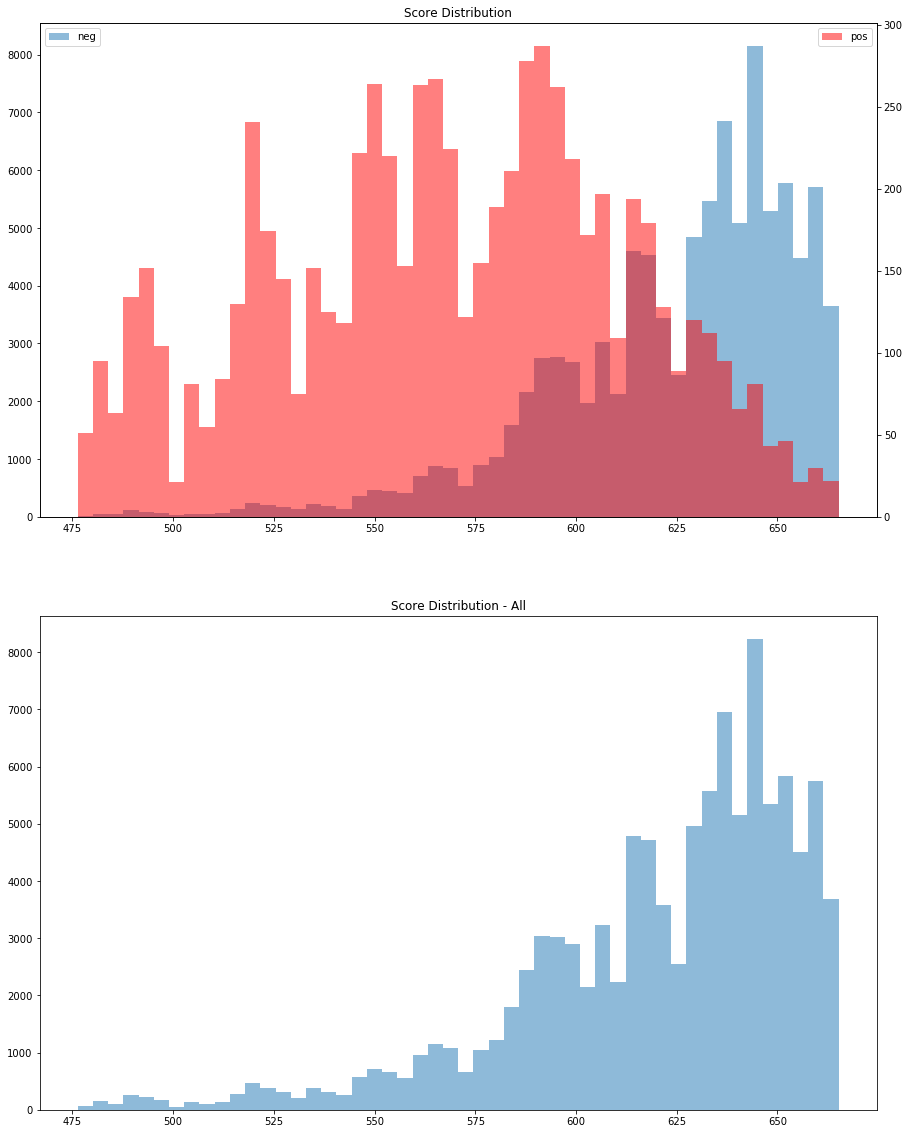

In [47]:
#Score Distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,20)

plt.subplot(2,1,1)
plt.title("Score Distribution")
h1 = plt.hist(ximu.df_scored[ximu.y_event == 0 ]["final_score"]
        ,histtype="stepfilled", bins=50, alpha=0.5, label = "neg")
plt.legend(loc = "upper left")
ax2 = plt.twinx()
h2 = plt.hist(ximu.df_scored[ximu.y_event == 1 ]["final_score"]
        ,histtype="stepfilled", color = "r", bins=50, alpha=0.5, label = "pos")

plt.xlabel("Score")
plt.xlabel("Obs cnt")
ax2.legend(loc = "upper right")

plt.subplot(2,1,2)
plt.title("Score Distribution - All")
plt.hist(ximu.df_scored["final_score"]
        ,histtype="stepfilled", bins=50, alpha=0.5, label = "total")

plt.show()

In [15]:
ximu.df_scored.columns

Index([u'DebtRatio', u'MonthlyIncome', u'NumberOfTime30-59DaysPastDueNotWorse',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfTimes90DaysLate',
       u'RevolvingUtilizationOfUnsecuredLines', u'age', u'final_score'],
      dtype='object')

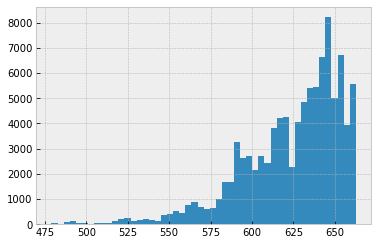

In [231]:
ximu.df_scored[ximu.y_event == 0 ]["final_score"].hist(bins = 50)

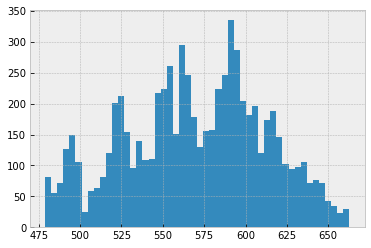

In [232]:
ximu.df_scored[ximu.y_event == 1 ]["final_score"].hist(bins = 50)

In [90]:
h1[0][0]

34.0

In [44]:
print plt.subplots.__doc__


    Create a figure and a set of subplots

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:

            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.

        When subplots have a shared x-axis along a column, only the x tick
        labels of the bottom subplot are visible.  Similarly, when subplots
        have a shared y-axis along a row, only th

In [160]:
ximu.df_woe_replaced.corr().to_excel("corr.xlsx")

In [152]:
print plt.plot.__doc__

Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-

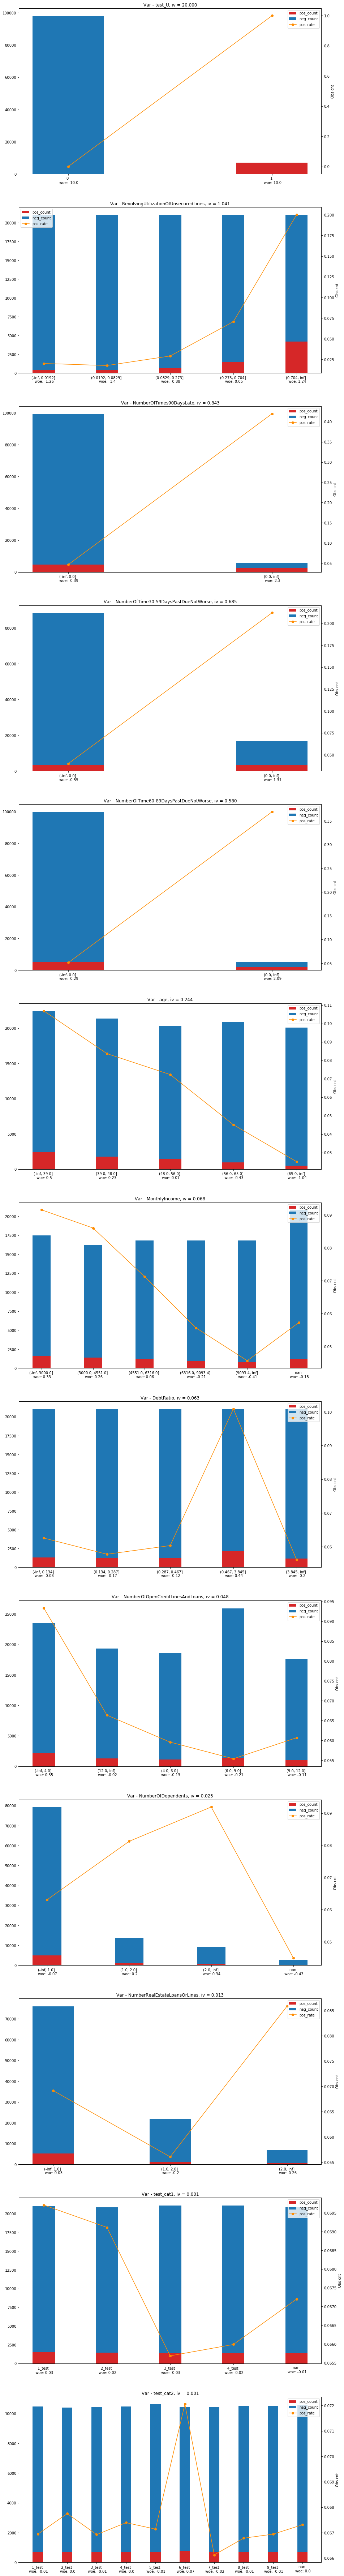

In [154]:
woe_t = ximu.woe_t
iv_t = ximu.iv_t

var_cnt = iv_t.shape[0]
woe_iv_plot,axes = plt.subplots(nrows = var_cnt,ncols = 1)
woe_iv_plot.set_size_inches(15,10 * var_cnt)
ax_cnt = 0

for i in iv_t.sort_values(by = "iv" ,ascending=False)["var_name"]:
    plt.subplot(var_cnt , 1 , ax_cnt+1)
    woe_t_sample = woe_t[woe_t["var_name"]==i]
    iv_value = iv_t[iv_t["var_name"]==i]["iv"].round(3).iloc[0]
    
    ind = np.arange(woe_t_sample.shape[0])    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
            
    p1 = plt.bar(ind, woe_t_sample["pos_count"], width, color='#d62728')
    p2 = plt.bar(ind, woe_t_sample["neg_count"], width, bottom=woe_t_sample["pos_count"])
    plt.twinx()
    p3 = plt.plot(ind,woe_t_sample["pos_count"]/woe_t_sample["cat_total_count"],'o-',color = "darkorange")
    plt.ylabel('Obs cnt')
    plt.title("Var - %s, iv = %.3f" % (i,iv_value))
    xticks = woe_t_sample["var_cat"]+" \n woe: " + woe_t_sample["woe"].round(2).astype("string")
    plt.xticks(ind, xticks)
    plt.legend((p1[0], p2[0],p3[0]), ('pos_count', 'neg_count','pos_rate'))
    re = plt.setp(axes[ax_cnt].get_xticklabels(),rotation = 30 ,horizontalalignment = "right")
    ax_cnt = ax_cnt+1

In [175]:
iv_lower_bound = 0.02
iv_upper_bound = 20

columns_iv = ximu.iv_t[(ximu.iv_t["iv"]>=iv_lower_bound) & (ximu.iv_t["iv"]<=iv_upper_bound)]["var_name"]
x = ximu.df_woe_replaced[columns_iv].drop(excluded_columns,axis = 1,errors = "ignore").reset_index(drop = True)
y = ximu.y.copy().reset_index(drop = True)
y[y==ximu.event] = 1
y[y<>ximu.event] = 0
ximu.y_event = y
x["__intercept"] = 1
ximu.model = sm.Logit(endog=y , exog=x)
ximu.model_result = ximu.model.fit()
print ximu.model_result.summary()

Optimization terminated successfully.
         Current function value: 0.185833
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104991
Method:                           MLE   Df Model:                            8
Date:                Tue, 19 Sep 2017   Pseudo R-squ.:                  0.2483
Time:                        17:46:34   Log-Likelihood:                -19512.
converged:                       True   LL-Null:                       -25957.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.7312      0.0

{'boxes': [<matplotlib.lines.Line2D at 0x17447a58>,
 'caps': [<matplotlib.lines.Line2D at 0x15aa0358>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x15a93208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x174474e0>,
  <matplotlib.lines.Line2D at 0x1650a048>]}

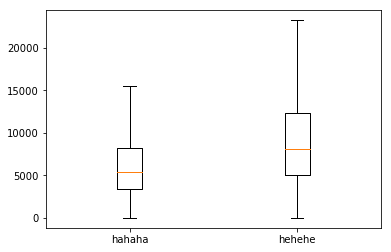

In [31]:
#print sm.add_constant.__doc__
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx = x.copy()
xx["MonthlyIncome_2"] = xx["MonthlyIncome"]*1.5

plt.boxplot([xx["MonthlyIncome"].dropna(),xx["MonthlyIncome_2"].dropna()],sym = "",labels=["hahaha","hehehe"])

In [20]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,test_cat1,test_cat2,test_cat3,test_U
136346,0.048538,44,1,0.233141,5708.0,6,0,1,0,0.0,NaN,4_test,2_test,0
46174,0.159366,45,2,0.125553,7000.0,9,1,0,0,0.0,3_test,5_test,1_test,0
86722,0.347587,42,0,0.274431,4000.0,9,0,0,0,2.0,3_test,8_test,5_test,0
94067,0.177417,52,0,0.266701,11525.0,17,0,3,0,0.0,1_test,2_test,18_test,0
96086,0.188120,72,0,0.030691,4300.0,3,0,0,0,0.0,3_test,3_test,8_test,0


In [10]:
print plt.boxplot.__doc__

Make a box and whisker plot.

Make a box and whisker plot for each column of ``x`` or each
vector in sequence ``x``.  The box extends from the lower to
upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the
data.  Flier points are those past the end of the whiskers.

Parameters
----------
x : Array or a sequence of vectors.
    The input data.

notch : bool, optional (False)
    If `True`, will produce a notched box plot. Otherwise, a
    rectangular boxplot is produced. The notches represent the
    confidence interval (CI) around the median. See the entry
    for the ``bootstrap`` parameter for information regarding
    how the locations of the notches are computed.

    .. note::

        In cases where the values of the CI are less than the
        lower quartile or greater than the upper quartile, the
        notches will extend beyond the box, giving it a
        distinctive "flipped" appearance. This is expected
  